# R Markdown

In [1]:
knitr::opts_chunk$set(echo = TRUE)
library(readxl)
train <- read_excel("C:/Users/student/Desktop/train.xls")
train$Survived = factor(train$Survived)
train$Pclass = factor(train$Pclass)
library(ggplot2)

## 1 - Mising Values

In [2]:
sum(is.na(train))

[1] 866

## 2 - Replace Missing values by average for numeric

In [3]:
str(train)

sum(is.na(train$PassengerId))
sum(is.na(train$Age))
sum(is.na(train$SibSp))
sum(is.na(train$Parch))
sum(is.na(train$Fare))

train$Age[is.na(train$Age)] = mean(train$Age, na.rm = TRUE)
sum(is.na(train$Age))

Classes 'tbl_df', 'tbl' and 'data.frame':	891 obs. of  12 variables:
 $ PassengerId: num  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass     : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : num  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : num  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  NA "C85" NA "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


[1] 0

[1] 177

[1] 0

[1] 0

[1] 0

[1] 0

## 3 - Remove rows with missing categorical values

In [4]:
sum(is.na(train$Survived))
sum(is.na(train$Pclass))
sum(is.na(train$Name))
sum(is.na(train$Sex))
sum(is.na(train$Ticket))
sum(is.na(train$Cabin))
sum(is.na(train$Embarked))

sum((train$Cabin == "")|(train$Cabin == " "))

sum(train$Embarked != 'S' & train$Embarked != 'C' & train$Embarked != 'Q')

train1 = train[!train$Cabin =="" & !train$Embarked == "", ]
str(train1)

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 687

[1] 2

[1] NA

[1] NA

Classes 'tbl_df', 'tbl' and 'data.frame':	891 obs. of  12 variables:
 $ PassengerId: num  NA 2 NA 4 NA NA 7 NA NA NA ...
 $ Survived   : Factor w/ 2 levels "0","1": NA 2 NA 2 NA NA 1 NA NA NA ...
 $ Pclass     : Factor w/ 3 levels "1","2","3": NA 1 NA 1 NA NA 1 NA NA NA ...
 $ Name       : chr  NA "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" NA "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  NA "female" NA "female" ...
 $ Age        : num  NA 38 NA 35 NA NA 54 NA NA NA ...
 $ SibSp      : num  NA 1 NA 1 NA NA 0 NA NA NA ...
 $ Parch      : num  NA 0 NA 0 NA NA 0 NA NA NA ...
 $ Ticket     : chr  NA "PC 17599" NA "113803" ...
 $ Fare       : num  NA 71.3 NA 53.1 NA ...
 $ Cabin      : chr  NA "C85" NA "C123" ...
 $ Embarked   : chr  NA "C" NA "S" ...


## 4 - Remove column "Name", PassengerID and unnecessary columns

In [5]:
train[,1] = NULL
train[,"Embarked"] = NULL
train[,"Ticket"] = NULL
train[,"Cabin"] = NULL

## 5-10

In [7]:
mean(train$Age, na.rm = TRUE)
mean(train[train$Sex == "female",]$Age)
median(train[train$Pclass == "1",]$Fare)
median(train[train$Sex == "female" & train$Pclass != "1",]$Fare)
median(train[train$Survived == "1" & train$Sex == "female" & train$Pclass != "3",]$Age)
mean(train[train$Sex == "female" & train$Survived == "1" & train$Age >= "13" & train$Age < "20",]$Fare)

[1] 29.69912

[1] 28.21673

[1] 60.2875

[1] 14.45625

[1] 30

[1] 47.511

## 11 - Mean fare of female teenagers survived passengers for each class

In [8]:
mean(train[train$Sex == "female" & train$Pclass == "1" & train$Age >= "13" & train$Age < "20",]$Fare)
mean(train[train$Sex == "female" & train$Pclass == "2" & train$Age >= "13" & train$Age < "20",]$Fare)
mean(train[train$Sex == "female" & train$Pclass == "3" & train$Age >= "13" & train$Age < "20",]$Fare)

[1] 110.6842

[1] 20.67453

[1] 13.24536

## 12 - Ratio of Survived and not Survived passengers who pay more than avg fare

In [9]:
meanfare = mean(train$Fare)
train2 = train[train$Fare>meanfare,]
prop.table(table(train2$Survived))


        0         1 
0.4028436 0.5971564 

## 13 - Add column that standardizes the fare and name is sfare

In [10]:
train$sfare = (train$Fare - (mean(train$Fare))/sd(train$Fare))

## 14 - Bar Chart

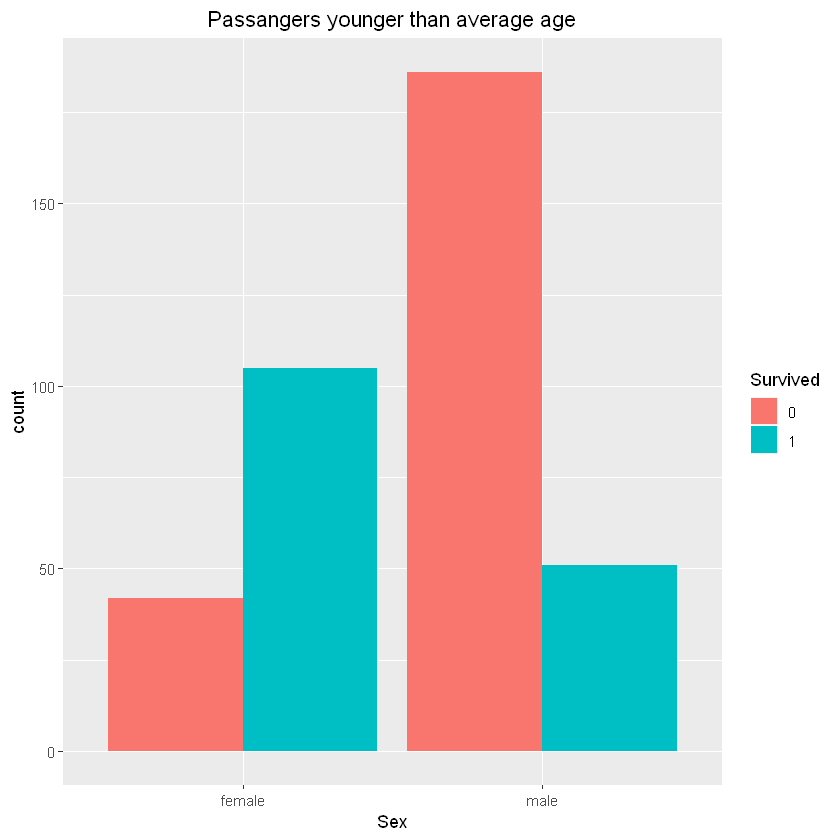

In [11]:
theme_update(plot.title = element_text(hjust = 0.5))

ggplot(train[train$Age<mean(train$Age), ] ) + geom_bar(mapping = aes (x= Sex, fill = Survived), position = 'dodge') +ggtitle("Passangers younger than average age")

## 15 - Plot the density of age of passengers who survived and pay more than avg fare

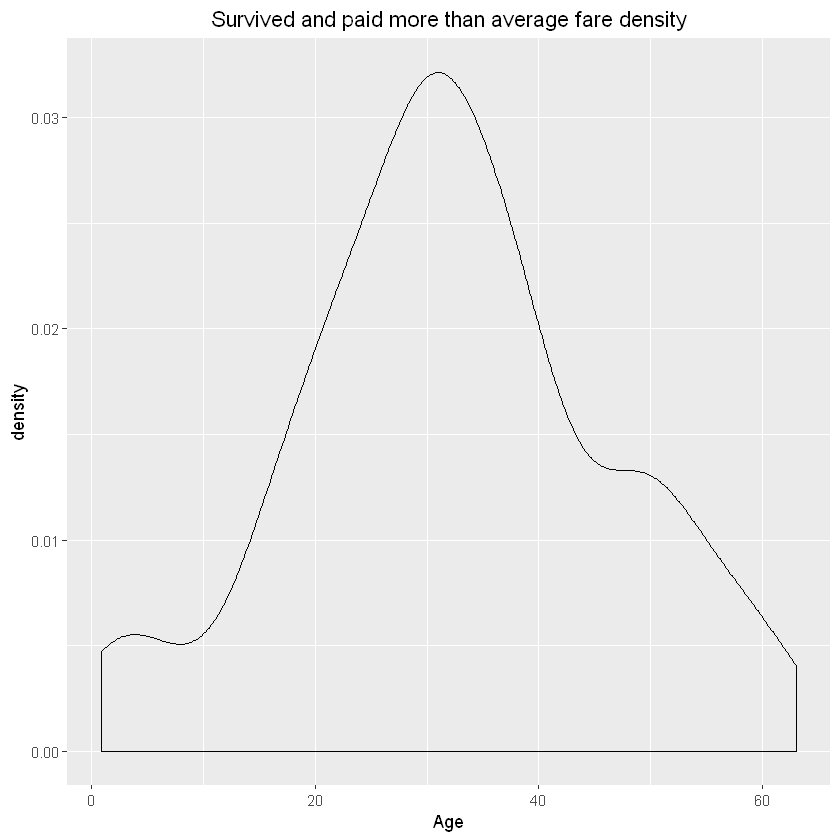

In [12]:
ggplot(train[(train$Survived =='1') & (train$Fare > mean(train$Fare)), ]) + geom_density(mapping = aes(x = Age)) + ggtitle("Survived and paid more than average fare density")

## 16 - Plot two density curves in one graph

Warning message:
"Unknown or uninitialised column: 'Embarked'."Warning message:
"Unknown or uninitialised column: 'Embarked'."Warning message:
"Length of logical index must be 1 or 891, not 0"

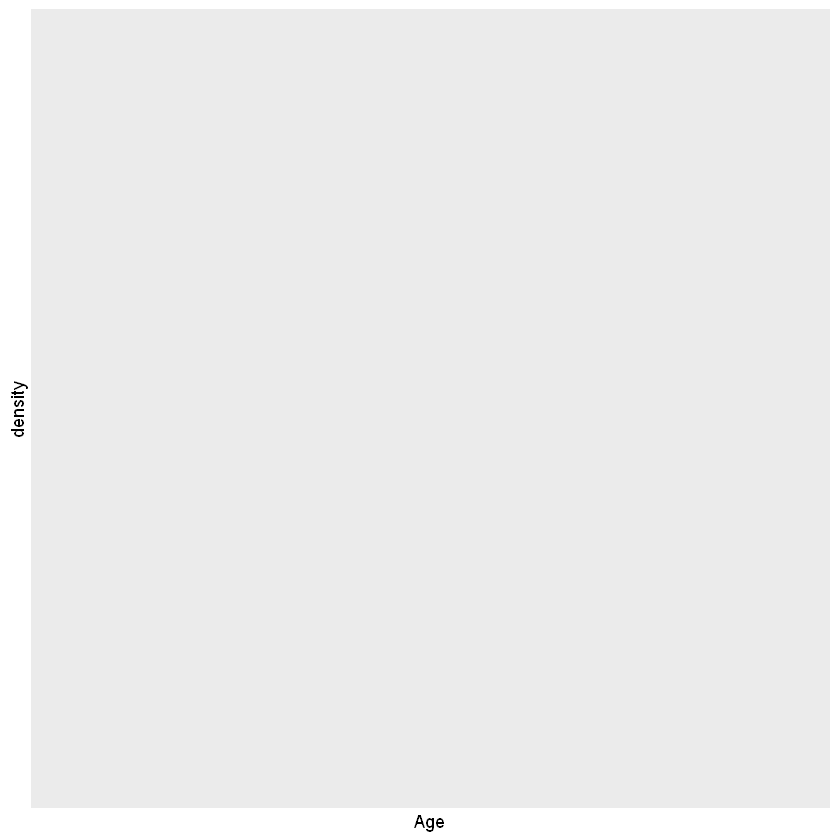

In [13]:
ggplot(train[(train$Embarked == "S") | (train$Embarked == "Q"), ]) + geom_density(mapping = aes(x= Age))

## 17 Add categorical variable "cfare"

In [14]:
train$cfare = ifelse(train$Fare > mean(train$Fare), c("Expensive"), c("Cheap"))
str(train)

Classes 'tbl_df', 'tbl' and 'data.frame':	891 obs. of  10 variables:
 $ Survived: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Name    : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex     : chr  "male" "female" "female" "female" ...
 $ Age     : num  22 38 26 35 35 ...
 $ SibSp   : num  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : num  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ sfare   : num  6.6 70.64 7.28 52.45 7.4 ...
 $ cfare   : chr  "Cheap" "Expensive" "Cheap" "Expensive" ...


## 18

In [15]:
attach(train)
train$cage[train$Age <= 10] = "0"
train$cage[train$Age > 10 & train$Age <= 20] = "1"
train$cage[train$Age > 20 & train$Age <= 30] = "2"
train$cage[train$Age > 30 & train$Age <= 40] = "3"
train$cage[train$Age > 40 & train$Age <= 50] = "4"
train$cage[train$Age > 50 & train$Age <= 60] = "5"
train$cage[train$Age > 60] = "6"
detach(train)
str(train1)

Warning message:
"Unknown or uninitialised column: 'cage'."

Classes 'tbl_df', 'tbl' and 'data.frame':	891 obs. of  12 variables:
 $ PassengerId: num  NA 2 NA 4 NA NA 7 NA NA NA ...
 $ Survived   : Factor w/ 2 levels "0","1": NA 2 NA 2 NA NA 1 NA NA NA ...
 $ Pclass     : Factor w/ 3 levels "1","2","3": NA 1 NA 1 NA NA 1 NA NA NA ...
 $ Name       : chr  NA "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" NA "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  NA "female" NA "female" ...
 $ Age        : num  NA 38 NA 35 NA NA 54 NA NA NA ...
 $ SibSp      : num  NA 1 NA 1 NA NA 0 NA NA NA ...
 $ Parch      : num  NA 0 NA 0 NA NA 0 NA NA NA ...
 $ Ticket     : chr  NA "PC 17599" NA "113803" ...
 $ Fare       : num  NA 71.3 NA 53.1 NA ...
 $ Cabin      : chr  NA "C85" NA "C123" ...
 $ Embarked   : chr  NA "C" NA "S" ...


## 19 Plot Bar Chart 

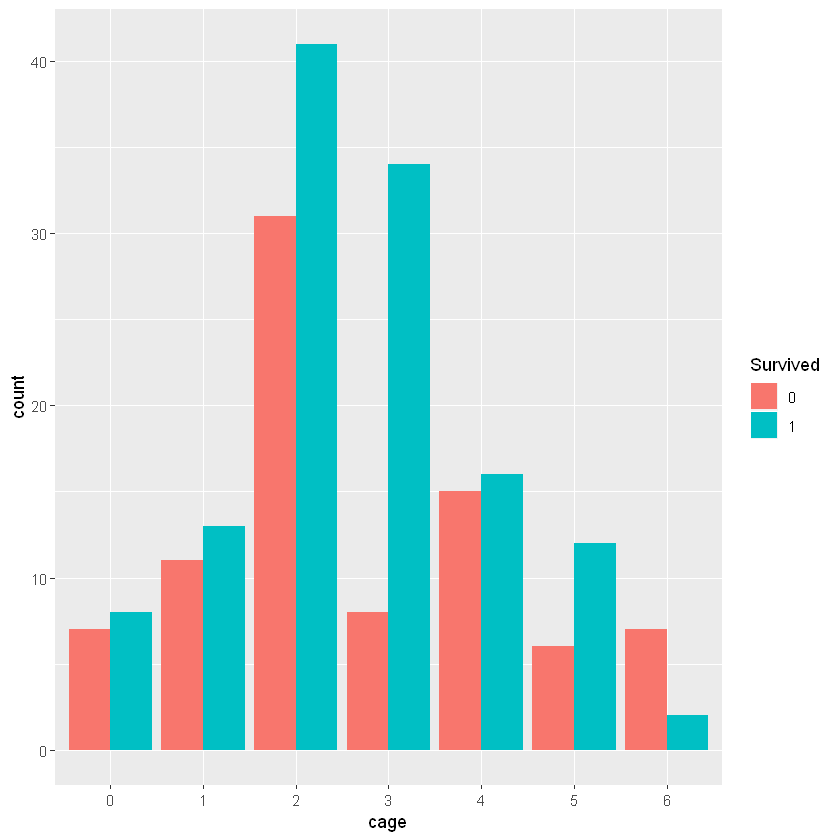

In [16]:
ggplot(train[train$cfare == "Expensive", ]) + geom_bar(mapping = aes(x = cage, fill = Survived), position = 'dodge')

## 20 - Split the bar chart in 19 by Pclass

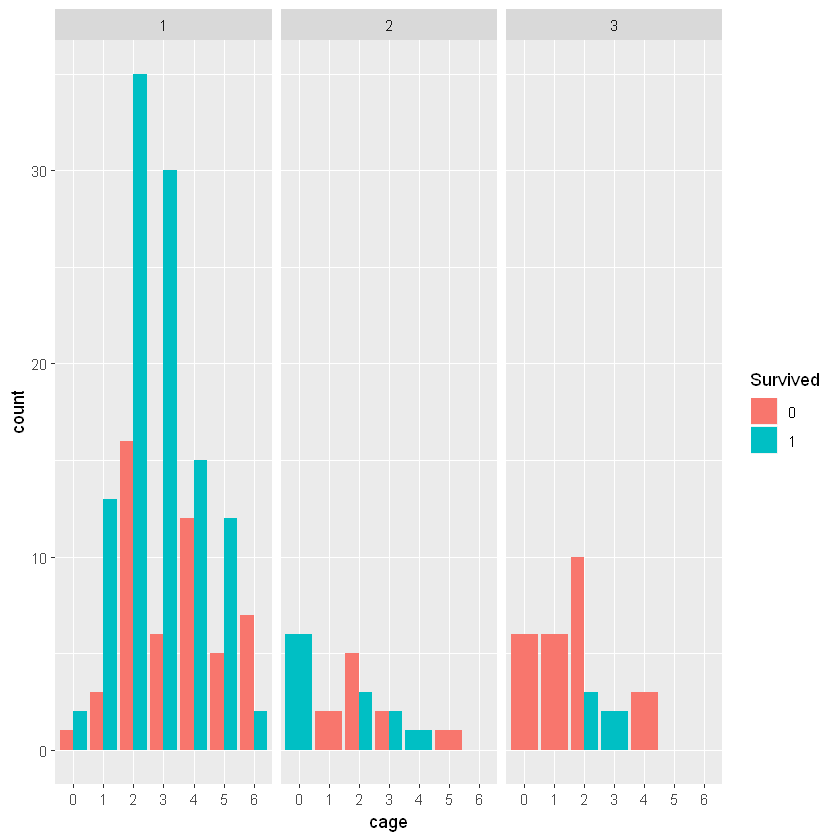

In [17]:
ggplot(train[train$cfare == "Expensive", ]) + geom_bar(mapping = aes(x = cage, fill = Survived), position = 'dodge') + 
 facet_wrap(~ Pclass)